In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def create_statistics(csv_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Calculate statistics
    statistics = {
        'Total Rows': len(df),
        'Total Columns': len(df.columns),
        'Column Names': df.columns.tolist(),
        'Missing Values': df.isnull().sum().to_dict(),
        'Data Types': df.dtypes.to_dict(),
        'Summary Statistics': df.describe().to_dict()
    }
    
    # Generate graphs
    for column in df.columns[1:]:  
        if df[column].dtype in ['int64', 'float64']:
            df[column].plot(kind='hist', title=column, alpha=0.75)
            plt.axvline(df[column].quantile(0.25), color='r', linestyle='--', label='25th Percentile')
            plt.axvline(df[column].quantile(0.5), color='g', linestyle='--', label='50th Percentile')
            plt.axvline(df[column].quantile(0.75), color='b', linestyle='--', label='75th Percentile')
            plt.xlabel('Power consumption MW')  # Add x-axis label
            plt.legend()
            plt.show()
        elif df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            value_counts.plot(kind='bar', title=column)
            plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
            plt.xlabel('Power consumption MW')
            plt.show()
    
    return statistics

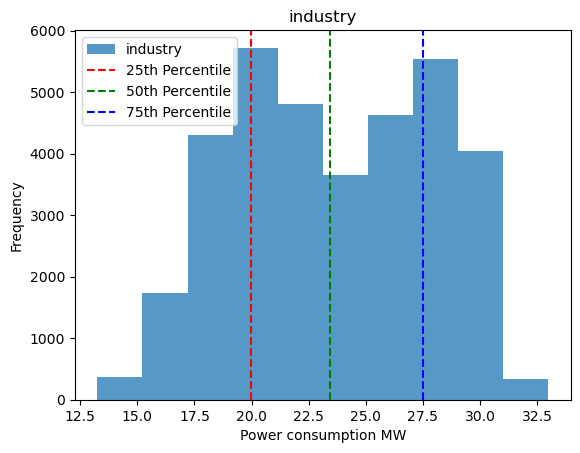

{'Total Rows': 35136, 'Total Columns': 2, 'Column Names': ['tick', 'industry'], 'Missing Values': {'tick': 0, 'industry': 0}, 'Data Types': {'tick': dtype('int64'), 'industry': dtype('float64')}, 'Summary Statistics': {'tick': {'count': 35136.0, 'mean': 17567.5, 'std': 10143.033865663665, 'min': 0.0, '25%': 8783.75, '50%': 17567.5, '75%': 26351.25, 'max': 35135.0}, 'industry': {'count': 35136.0, 'mean': 23.617800546448088, 'std': 4.302171350283674, 'min': 13.25, '25%': 19.99, '50%': 23.43, '75%': 27.51, 'max': 32.98}}}


In [3]:
csv_file = '/Users/kanankhasmammadov/Desktop/Thesis - Electrolyzer market participation/Flexable_industrial_h2_optimization/input/2016/industrial_demand.csv'
statistics = create_statistics(csv_file)
print(statistics)